<a href="https://colab.research.google.com/github/kdChen07/Financial_Engineering/blob/main/Monte_Carlo_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [29]:
def normfun(x, mu, sigma):
 pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
 return pdf

In [32]:
result = np.random.normal(0, 1, 10000)
print(result)

[ 0.22764789  0.82854526 -0.66531327 ...  1.78523087  0.4868169
 -1.14507269]


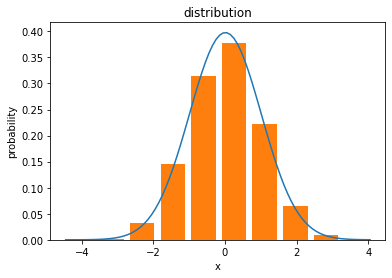

In [33]:
x = np.arange(min(result), max(result), 0.1)
y = normfun(x, result.mean(), result.std())
plt.plot(x, y)
plt.hist(result, bins=10, rwidth=0.8, density=True)
plt.title('distribution')
plt.xlabel('x')
plt.ylabel('probability')
plt.show()

添加参数

In [3]:
N1=100000
N2=250
S=100
a=np.ones(N1)
S0=S*a
T=365/365
t_delta=T/N2
St=S0
mu=0.1
r=0.1
sigma=0.3
K=100

In [34]:
b=np.zeros((N1,N2))
print(b)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
b.shape[0]

100000

In [36]:
b[:,0]=S0

In [37]:
b

array([[100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.],
       [100.,   0.,   0., ...,   0.,   0.,   0.]])

In [38]:
for i in range(0,N1):
  # c=np.random.normal(0, 1, N2)
  result = np.random.normal(0, 1, 10000)
  for t in range(1,N2):
    b[i,t]=b[i,t-1]+mu*b[i,t-1]*t_delta+sigma*b[i,t-1]*math.sqrt(t_delta)*result[t]


In [39]:
b

array([[100.        ,  98.3133079 ,  99.20797825, ..., 105.83147951,
        105.94918911, 103.70092841],
       [100.        ,  99.44687258,  99.06500072, ..., 127.05226934,
        129.67771489, 130.85818574],
       [100.        ,  96.95233402,  97.1115896 , ..., 105.25064565,
        105.70322942, 107.16428337],
       ...,
       [100.        , 101.20701683, 102.00540758, ...,  86.51377771,
         87.07890114,  90.76451926],
       [100.        , 101.46548436, 105.14517427, ...,  84.32405114,
         84.47832672,  86.17018576],
       [100.        ,  99.55049668,  99.10321291, ..., 157.65168718,
        159.62166583, 162.92568952]])

In [40]:
x = np.arange(0,250,1)
y = b

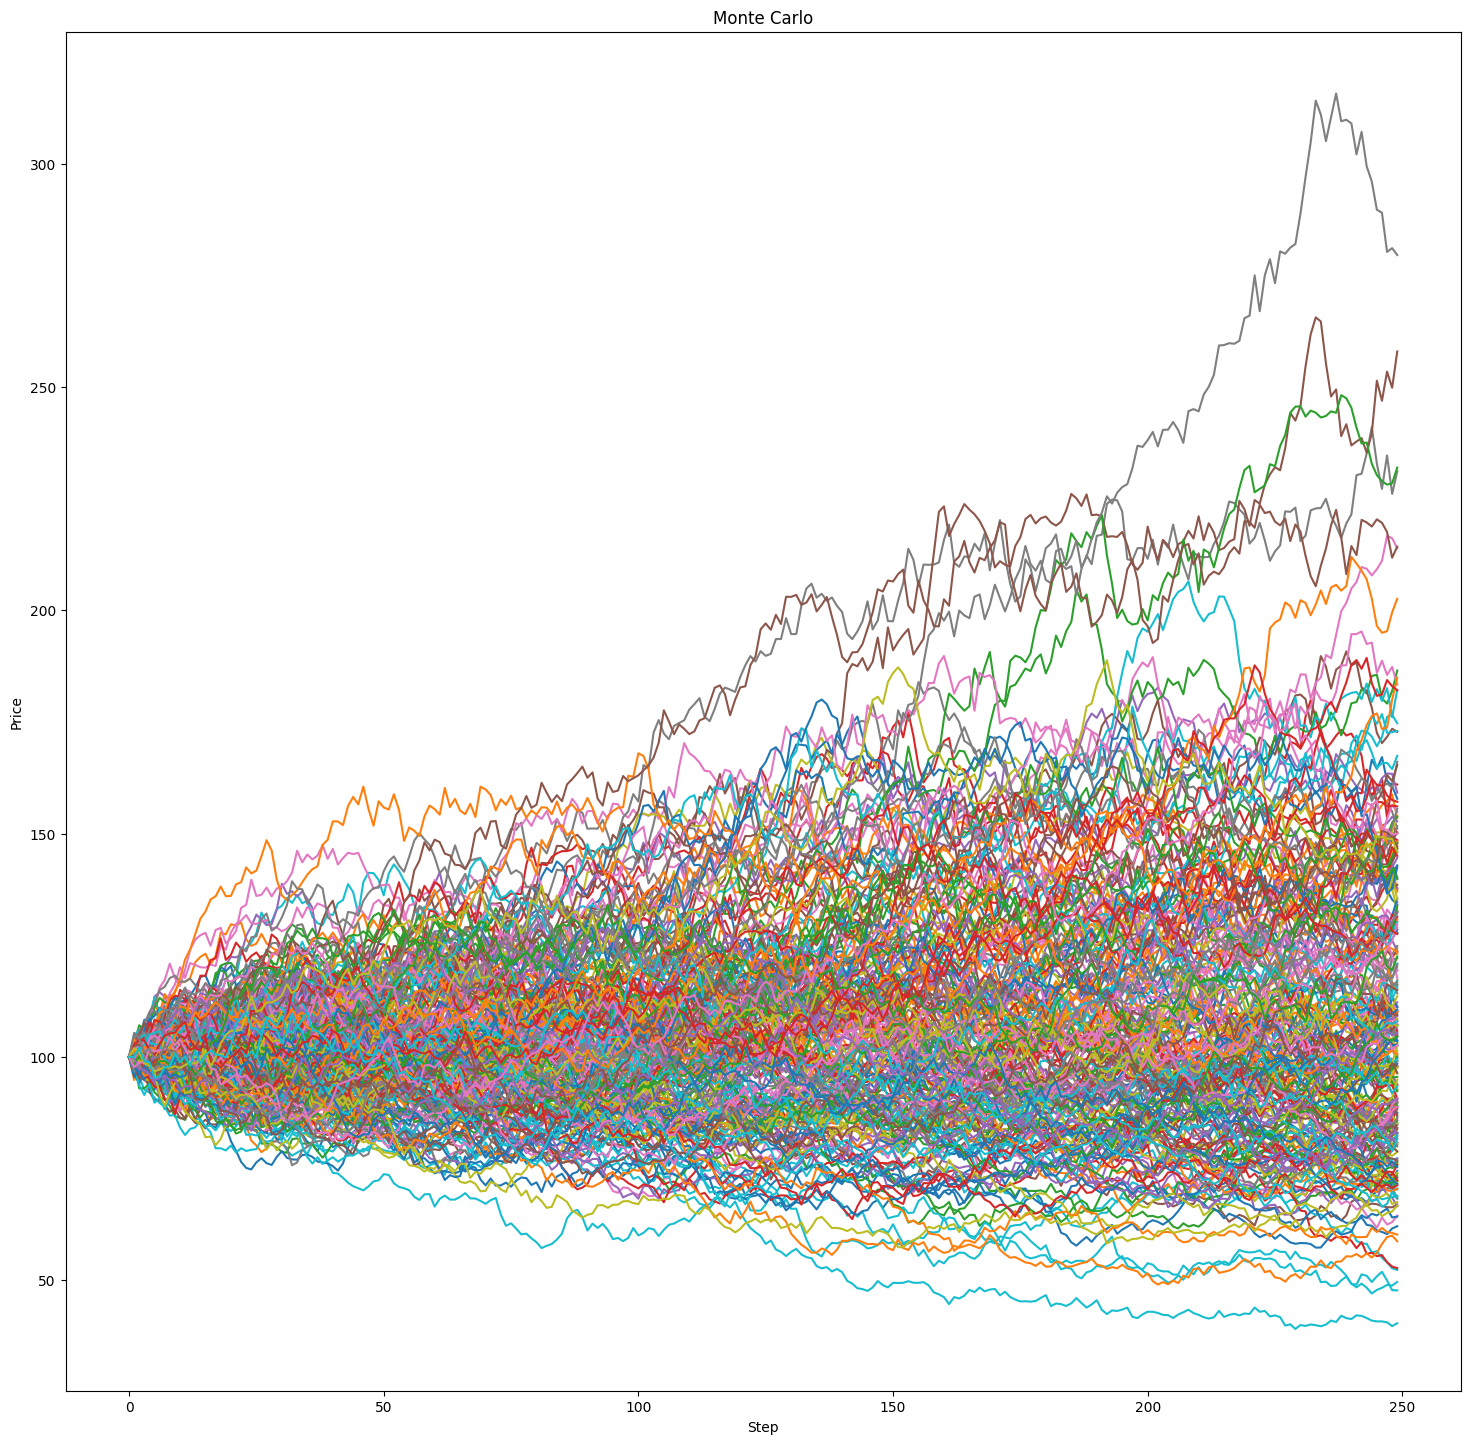

In [50]:
plt.subplots(figsize=(18,18),dpi=100)
for i in range(0,N2):
  plt.plot(x, y[i,:])
  plt.title('Monte Carlo')
  plt.xlabel('Step')
  plt.ylabel('Price')

In [69]:
b

array([[100.        ,  98.3133079 ,  99.20797825, ..., 105.83147951,
        105.94918911, 103.70092841],
       [100.        ,  99.44687258,  99.06500072, ..., 127.05226934,
        129.67771489, 130.85818574],
       [100.        ,  96.95233402,  97.1115896 , ..., 105.25064565,
        105.70322942, 107.16428337],
       ...,
       [100.        , 101.20701683, 102.00540758, ...,  86.51377771,
         87.07890114,  90.76451926],
       [100.        , 101.46548436, 105.14517427, ...,  84.32405114,
         84.47832672,  86.17018576],
       [100.        ,  99.55049668,  99.10321291, ..., 157.65168718,
        159.62166583, 162.92568952]])

In [79]:
sum=0
for i in range(0,N1):
  sum=sum+max(K-b[i,N2-1],0)
PutMC=sum/N1*math.exp(-r*T)

In [80]:
PutMC

7.241956437019879

In [81]:
sum=0
for i in range(0,N1):
  sum=sum+max(b[i,N2-1]-K,0)
CallMC=sum/N1*math.exp(-r*T)

In [82]:
CallMC

16.648236156322167